In [21]:
import pandas as pd
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
data = pd.read_csv("mushroom_cleaned.csv")
data

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
...,...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195,1
54031,82,2,3,2,1.186164,490,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1
54033,79,2,3,2,1.034963,491,12,0.888450,1


In [27]:
y = data["class"].to_numpy()

In [28]:
X = data.iloc[:, :-1].to_numpy()

In [29]:
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [30]:
X

array([[1.37200000e+03, 2.00000000e+00, 2.00000000e+00, ...,
        1.54500000e+03, 1.10000000e+01, 1.80427271e+00],
       [1.46100000e+03, 2.00000000e+00, 2.00000000e+00, ...,
        1.55700000e+03, 1.10000000e+01, 1.80427271e+00],
       [1.37100000e+03, 2.00000000e+00, 2.00000000e+00, ...,
        1.56600000e+03, 1.10000000e+01, 1.80427271e+00],
       ...,
       [8.20000000e+01, 5.00000000e+00, 3.00000000e+00, ...,
        5.84000000e+02, 1.20000000e+01, 8.88450288e-01],
       [7.90000000e+01, 2.00000000e+00, 3.00000000e+00, ...,
        4.91000000e+02, 1.20000000e+01, 8.88450288e-01],
       [7.20000000e+01, 5.00000000e+00, 3.00000000e+00, ...,
        4.92000000e+02, 1.20000000e+01, 8.88450288e-01]])

In [31]:
X_train, X_tv, Y_train, Y_tv = train_test_split(X, y, test_size=0.25)

In [32]:
X_test, X_valid, Y_test, Y_valid = train_test_split(X_tv, Y_tv, test_size=0.5)

In [33]:
scaler = StandardScaler()

In [34]:
X_train = scaler.fit_transform(X_train)

In [35]:
X_test = scaler.transform(X_test)

In [36]:
X_valid = scaler.transform(X_valid)

In [37]:
len(X_train), len(X_test)

(40526, 6754)

In [38]:
len(Y_train), len(Y_test)

(40526, 6754)

### Train the model

In [39]:
N, D = X_train.shape

In [40]:
K = 1

In [41]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((D,)),
    tf.keras.layers.Dense(K, activation="sigmoid")
])

In [42]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [43]:
r = model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), epochs=150)

Epoch 1/150
1267/1267 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6053 - loss: 0.6689 - val_accuracy: 0.6382 - val_loss: 0.6376
Epoch 2/150
1267/1267 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6338 - loss: 0.6420 - val_accuracy: 0.6389 - val_loss: 0.6332
Epoch 3/150
1267/1267 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6303 - loss: 0.6406 - val_accuracy: 0.6403 - val_loss: 0.6315
Epoch 4/150
1267/1267 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6332 - loss: 0.6388 - val_accuracy: 0.6395 - val_loss: 0.6310
Epoch 5/150
1267/1267 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6297 - loss: 0.6368 - val_accuracy: 0.6441 - val_loss: 0.6308
Epoch 6/150
1267/1267 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6340 - loss: 0.6366 - val_accuracy: 0.6416 - val_loss: 0.6308
Epoch 7/150
1267/1267 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6342 - loss: 0.6365 - val_accuracy: 0.6410 - val_loss: 0.6304
Epoch 8/150
1267/1267 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6346 - loss: 0

1267/1267 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6288 - loss: 0.6386 - val_accuracy: 0.6416 - val_loss: 0.6305
Epoch 51/150
1267/1267 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6302 - loss: 0.6400 - val_accuracy: 0.6417 - val_loss: 0.6306
Epoch 52/150
1267/1267 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6358 - loss: 0.6354 - val_accuracy: 0.6406 - val_loss: 0.6306
Epoch 53/150
1267/1267 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6377 - loss: 0.6348 - val_accuracy: 0.6401 - val_loss: 0.6309
Epoch 54/150
1267/1267 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6355 - loss: 0.6374 - val_accuracy: 0.6403 - val_loss: 0.6310
Epoch 55/150
1267/1267 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6336 - loss: 0.6372 - val_accuracy: 0.6431 - val_loss: 0.6309
Epoch 56/150
1267/1267 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6341 - loss: 0.6398 - val_accuracy: 0.6416 - val_loss: 0.6309
Epoch 57/150
1267/1267 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6372 - loss: 0.6355

1267/1267 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6335 - loss: 0.6355 - val_accuracy: 0.6407 - val_loss: 0.6306
Epoch 100/150
1267/1267 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6299 - loss: 0.6391 - val_accuracy: 0.6428 - val_loss: 0.6305
Epoch 101/150
1267/1267 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6364 - loss: 0.6352 - val_accuracy: 0.6429 - val_loss: 0.6306
Epoch 102/150
1267/1267 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6284 - loss: 0.6400 - val_accuracy: 0.6400 - val_loss: 0.6306
Epoch 103/150
1267/1267 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6348 - loss: 0.6383 - val_accuracy: 0.6417 - val_loss: 0.6306
Epoch 104/150
1267/1267 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6303 - loss: 0.6395 - val_accuracy: 0.6425 - val_loss: 0.6308
Epoch 105/150
1267/1267 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6363 - loss: 0.6357 - val_accuracy: 0.6417 - val_loss: 0.6305
Epoch 106/150
1267/1267 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6327 - loss:

1267/1267 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step - accuracy: 0.6306 - loss: 0.6396 - val_accuracy: 0.6412 - val_loss: 0.6305
Epoch 148/150
1267/1267 ━━━━━━━━━━━━━━━━━━━━ 1s 710us/step - accuracy: 0.6324 - loss: 0.6361 - val_accuracy: 0.6388 - val_loss: 0.6312
Epoch 149/150
1267/1267 ━━━━━━━━━━━━━━━━━━━━ 1s 744us/step - accuracy: 0.6273 - loss: 0.6393 - val_accuracy: 0.6423 - val_loss: 0.6304
Epoch 150/150
1267/1267 ━━━━━━━━━━━━━━━━━━━━ 1s 736us/step - accuracy: 0.6349 - loss: 0.6372 - val_accuracy: 0.6437 - val_loss: 0.6306


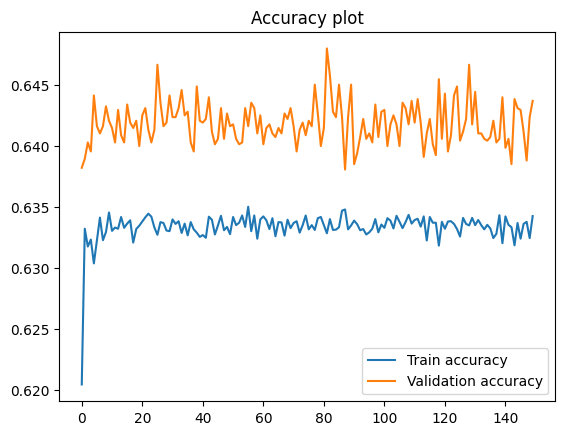

In [44]:
plt.plot(r.history["accuracy"], label="Train accuracy")
plt.plot(r.history["val_accuracy"], label="Validation accuracy")
plt.title("Accuracy plot")
plt.legend();

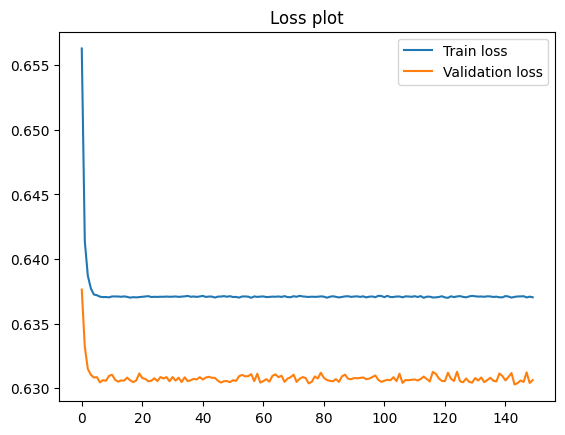

In [45]:
plt.plot(r.history["loss"], label="Train loss")
plt.plot(r.history["val_loss"], label="Validation loss")
plt.title("Loss plot")
plt.legend();

In [46]:
print(f"Train classification rate: {r.history['accuracy'][-1]*100:.02f}%")

Train classification rate: 63.42%


In [47]:
print(f"Train loss: {r.history['loss'][-1]}%")

Train loss: 0.637031078338623%


In [48]:
evaluation = model.evaluate(X_test, Y_test)

212/212 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.6436 - loss: 0.6321


In [49]:
print(f"Test classification rate: {evaluation[1] * 100:.02f}%")

Test classification rate: 64.18%


In [50]:
print(f"Test loss: {evaluation[0]}")

Test loss: 0.6358535885810852


In [51]:
Y_pred = np.round(model.predict(X_test))

212/212 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step


In [52]:
confusion_matrix = confusion_matrix(Y_pred, Y_test) 

In [53]:
print(confusion_matrix)

[[1681 1081]
 [1338 2654]]
